In [116]:
##------ Usual package loading -----

import matplotlib.pyplot as plt
import numpy as np
import scipy
import xarray as xr
from helita.sim import rh15d

In [117]:
#---- Loading the output with xarrays ----
ray = xr.open_dataset('output_ray.hdf5')
aux = xr.open_dataset('output_aux.hdf5')
indata = xr.open_dataset('output_indata.hdf5')
ray # As you can see, ray is an xarray dataset which contains different coordinates, variables, indices and attributes.

<xarray.Dataset>
Dimensions:              (x: 1, y: 1, height: 82, wavelength_selected: 2,
                          wavelength: 424)
Coordinates:
  * wavelength           (wavelength) float64 30.0 35.0 40.0 ... 866.8 866.9
  * wavelength_selected  (wavelength_selected) float64 393.4 396.8
  * x                    (x) float64 0.0
  * y                    (y) float64 0.0
Dimensions without coordinates: height
Data variables:
    Jlambda              (x, y, height, wavelength_selected) float32 ...
    chi                  (x, y, height, wavelength_selected) float32 ...
    intensity            (x, y, wavelength) float32 ...
    scattering           (x, y, height, wavelength_selected) float32 ...
    source_function      (x, y, height, wavelength_selected) float32 ...
    wavelength_indices   (wavelength_selected) int32 ...
Attributes:
    atmosID:              FALC_82_5x5.hdf5 (Wed Dec  6 00:29:06 2023)
    snapshot_number:      0
    rev_id:               97fcad2  Tiago Pereira  2023-08-02 18:56:22 +0200
    nx:                   1
    ny:                   1
    nz:                   82
    nwave:                424
    wavelength_selected:  2
    creation_time:        2023-12-15T02:59:36+0530

## Now I am interested in plotting the xarray variable intensity

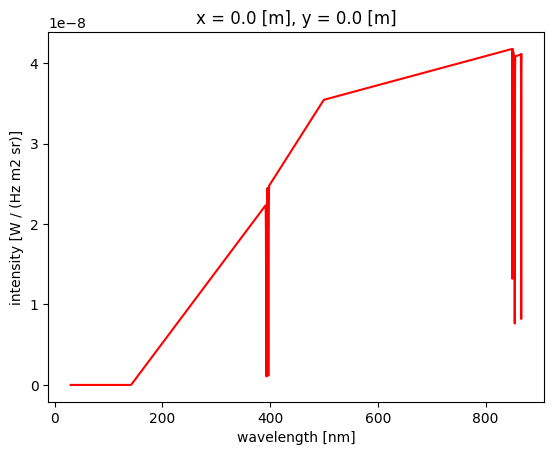

In [9]:
ray.intensity.plot(color='red')

As you can see the advantage or rather the power of using xarrays is to showcase that you do not need to worry about putting the labels, or titles. It automatically takes it from the xarray coordinates. See above. 

Now the plot above perhaps does not make sense at first. After all it is showing the Ca II intensity as a function of *all* calculated wavelengths. Perhaps we might be interested to zoom in to Ca II 854.2 nm line?

Text(0.5, 1.0, 'Ca II 854.2 spectrum')

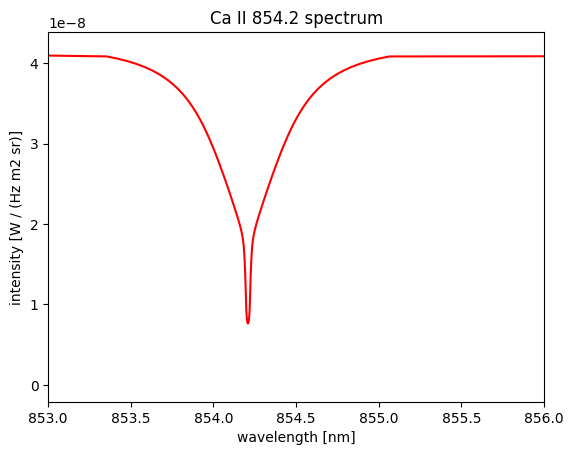

In [59]:
ray.intensity.plot(color='red')
plt.xlim([853,856]) #Just simply setting the x limits separately.
plt.title(r'Ca II 854.2 spectrum')

## Alternative way of handling the RH1.5D output using helita.

In [115]:
data = rh15d.Rh15dout() #this is empty because by we are inside the run/output directory. It should always point to the output/ directory under the respective run directory

--- Read ./output_aux.hdf5 file.
--- Read ./output_indata.hdf5 file.
--- Read ./output_ray.hdf5 file.


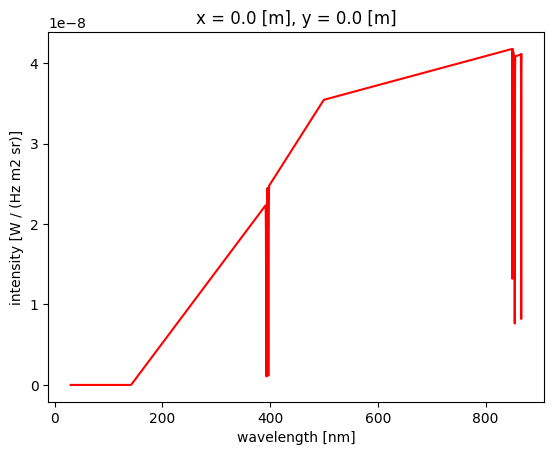

In [114]:
data.ray.intensity.plot(color='red')

# Exploring the input atmosphere file

If you look at the `keyword.input` file and check the variable `ATMOS_FILE`, you will see that it points to `../../Atmos/FALC_82_5x5.hdf5`. This is one of the famous Fontenla, Avrett and Loeser (FAL) averaged quiet-Sun atmospheres which was proposed by these three authors back in [1993](https://articles.adsabs.harvard.edu/pdf/1993ApJ...406..319F) provided to you in HDF5 format and replicated to 5x5 columns in 3D. All columns have the same information. Under the directory `rh/Atmos` you will also find a file called `bifrost_cb24bih_s385_cut.hdf5`, which is a cut from a 3D simulation from _Bifrost_. We will use this later but for the time let us focus on exploring the FAL-C atmosphere. 

In [62]:
# Again using xarrays.
input_atmos = xr.open_dataset('/Users/souvikb/rh/Atmos/FALC_82_5x5.hdf5')
input_atmos

<xarray.Dataset>
Dimensions:               (snapshot_number: 1, x: 5, y: 5, depth: 82, nhydr: 6)
Coordinates:
  * x                     (x) int64 0 1 2 3 4
  * y                     (y) int64 0 1 2 3 4
    z                     (snapshot_number, depth) float32 ...
  * snapshot_number       (snapshot_number) int32 0
Dimensions without coordinates: depth, nhydr
Data variables:
    temperature           (snapshot_number, x, y, depth) float32 ...
    velocity_z            (snapshot_number, x, y, depth) float32 ...
    electron_density      (snapshot_number, x, y, depth) float64 ...
    hydrogen_populations  (snapshot_number, nhydr, x, y, depth) float32 ...
    velocity_turbulent    (snapshot_number, x, y, depth) float32 ...
Attributes:
    comment:          Created with make_xarray_atmos on 2018-01-25 15:28:10.4...
    boundary_top:     0
    boundary_bottom:  1
    has_B:            0
    description:      FAL C model with 82 depth points replicated to 5x5 colu...
    nx:               5
    ny:               5
    nz:               82
    nt:               1

## Let's plot the different data variables displayed above as a function of depth.

(-0.2130397953093052, 2.270679856091738, 0.0, 1.0)

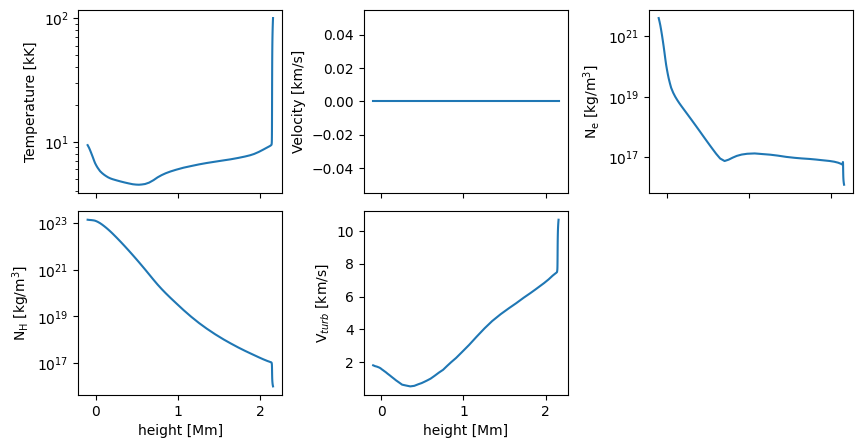

In [109]:
fig, axs = plt.subplots(nrows=2, ncols=3,sharex=True,figsize=(10,5))
plt.subplots_adjust(wspace=0.4,hspace=0.1)

axs[0,0].plot(input_atmos.z[0,:]/1e6,input_atmos.temperature[0,0,0,:]/1e3)
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel('Temperature [kK]')

axs[0,1].plot(input_atmos.z[0,:]/1e6,input_atmos.velocity_z[0,0,0,:]/1e3)
# axs[0,1].set_yscale('log')
axs[0,1].set_ylabel('Velocity [km/s]')

axs[0,2].plot(input_atmos.z[0,:]/1e6,input_atmos.electron_density[0,0,0,:])
axs[0,2].set_yscale('log')
axs[0,2].set_ylabel(r'N$_{\mathrm{e}}$ [kg/m$^{3}$]')

## Note for hydrogen populations: Note that the population is divided across the 6 levels. I am plotting the total population.
axs[1,0].plot(input_atmos.z[0,:]/1e6,input_atmos.hydrogen_populations.sum(dim='nhydr')[0,0,0,:])# note the .sum(dim='...')
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'N$_{\mathrm{H}}$ [kg/m$^{3}$]')
axs[1,0].set_xlabel('height [Mm]')

axs[1,1].plot(input_atmos.z[0,:]/1e6,input_atmos.velocity_turbulent[0,0,0,:]/1e3)
axs[1,1].set_ylabel(r'V$_{turb}$ [km/s]')
axs[1,1].set_xlabel('height [Mm]')

axs[1,2].axis('off')

## Task: Can you plot the atmosphere for any one pixel for the `bifrost_cb24bih_s385_cut.hdf5` atmosphere? 

In [ ]:
##---- Your code here-----